In [3]:
# See Jupyter Notebook at https://www.kaggle.com/paultimothymooney/mnist-digit-recognizer-method-comparison

%matplotlib inline
# Import libraries for numerical computations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Set working directory
import os
os.chdir('/home/ubuntu')

# Load the data (from Kaggle)
data = pd.read_csv('train.csv')
testingData = pd.read_csv('test.csv')
X = data.drop("label",axis=1).values
y = data.label.values


In [4]:

# Here I begin the project by describing the shape and composition of the MNIST dataset.

def describeDataset(input):
    """
    This function describes the shape of the dataset.  
    Note that the dataset was downloaded from Exercise 3 
    of the Coursera course titled "Machine Learning"
    """
    print('')
    print("'X' shape: %s."%(X.shape,))
    print('')
    print("'y' shape: %s."%(y.shape,))
    print('')
    print("Unique elements in y: %s"%(np.unique(y)))

describeDataset(data)



'X' shape: (42000, 784).

'y' shape: (42000,).

Unique elements in y: [0 1 2 3 4 5 6 7 8 9]


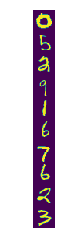

In [5]:

# Display the images.

def displayDataOne(input):
    """
    Display the data.
    """
    # Add column of 1's to X
        # This is necessary because by adding a column of ones we create the intercept term (after matrix multiplication)  
        # Y = MX + B for y = [1,X] x M but not for y = [X] x M
        # https://www.unc.edu/courses/2007spring/soci/709/001/matrixalg.pdf
    #X = data['X']
    X = data.drop("label",axis=1).values
    Xone = np.insert(X,0,1,axis=1)
    # Display the data
        # convert a row of 784 values to a 28x28 matrix
    tenImages = np.random.choice(Xone.shape[0], 10)
    plt.imshow(Xone[tenImages,1:].reshape(-1,28))
    plt.axis('off')
    return

displayDataOne(data)


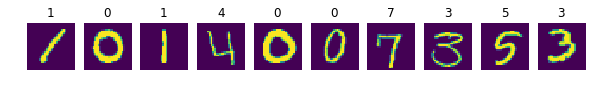

In [6]:
# Display more images.  

def displayDataTwo(input):
    """
    Displays 10 handwritten digis
    and 10 classification labels
    """
    
    figure,image = plt.subplots(1,10, figsize=(10,10))
    for i in range(10):
        image[i].imshow(X[i].reshape((28,28)))
        image[i].axis('off')
        image[i].set_title(y[i])

displayDataTwo(data)

In [7]:

# The goal is to take an image of a number and correctly identify the number. 
# To do this, I will import some additional Python libraries that contain
# methods and algorithms that are helpful for machine learning applications.

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
#from sklearn.metrics import make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

# We will need to split up our training data, setting aside 20%
# of the training data for cross-validation testing, such that we can avoid
# potentially overfitting the data.

# Load the data
data = pd.read_csv('train.csv')
testingData = pd.read_csv('test.csv')

# Limit sample size for debugging
X = data.iloc[0:100,1:] # everything but the first column for the first 50 examples (pixel values)
y = data.iloc[0:100,:1] # first column only for the first 50 examples (label/answer)
# You can remove the limit when executing the final script
#X = data.iloc[0:5000,1:] # everything but the first column  (pixel values)
#y = data.iloc[0:5000,:1] # first column only  (label/answer)

# Split the training data for cross-validation later
X_train = 0
X_test = 0
Y_train = 0
Y_test = 0
xValues = X
yValues = y.values.ravel()
X_train, X_test, Y_train, Y_test = train_test_split(xValues, yValues, test_size=0.2, random_state=23)
# Note that train_test_split was the simport part here where we split up the data into training and testing subsets.



Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.650000 (0.156125)
RF: 0.500000 (0.209165)
KNN: 0.625000 (0.158114)
SVM: 0.087500 (0.080039)
LSVM: 0.637500 (0.141973)
GNB: 0.500000 (0.209165)
DTC: 0.487500 (0.117925)


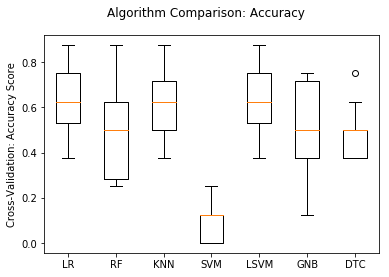


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier



In [9]:
# There are a lot of different classification algorithms to choose between.
# Let's compare 7 of them.

def compareABunchOfDifferentModelsAccuracy(input):
    """
    This function takes as an input the dataframe "trainingData" which contains the data from "data.csv".  
    The output is a table and boxplot illustrating the accuracy score for each of nine algorithms given this input.
    """    

    print('')
    print('Compare Multiple Classifiers:')
    print('')
    print('K-Fold Cross-Validation Accuracy:')
    print('')
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))
#    models.append(('GBC', GradientBoostingClassifier()))
#    models.append(('LDA', LinearDiscriminantAnalysis()))
        
    resultsAccuracy = []
    names = []
    for name, model in models:
        model.fit(X_train, Y_train)
        kfold = model_selection.KFold(n_splits=10, random_state=7)
        accuracy_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage)
   
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Cross-Validation: Accuracy Score')
    plt.show()
    return

compareABunchOfDifferentModelsAccuracy(data)

def defineModels():
    """
    This function just defines each abbreviation used in the previous function (e.g. LR = Logistic Regression)
    """
    print('')
    print('LR = LogisticRegression')
    print('RF = RandomForestClassifier')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('LSVM = LinearSVC')
    print('GNB = GaussianNB')
    print('DTC = DecisionTreeClassifier')
#    print('GBC = GradientBoostingClassifier')
#    print('LDA = LinearDiscriminantAnalysis')
    print('')
    return

defineModels()



After binary conversion:


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.817500 (0.081432)
RF: 0.695000 (0.054544)
KNN: 0.802500 (0.049308)
SVM: 0.625000 (0.084410)
LSVM: 0.795000 (0.065955)
GNB: 0.660000 (0.067268)
DTC: 0.557500 (0.035444)


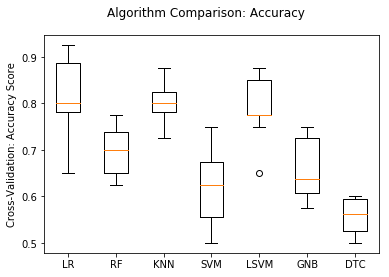


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier


Logistic Regression - Training set accuracy: 0.76 (0.156204993518)


Support Vector Machine - Training set accuracy: 0.21 (0.151327459504)


K-Nearest Neighbor Classifier - Training set accuracy: 0.65 (0.15)



In [10]:

# The score for Support Vector Machines is very low, but I know this approach should work well.
# I will try converting the images to binary form, such that there are only two possible values.

### BINARY CONVERSION


# Here I again modify the sample size to make things easier for debugging.

X = data.iloc[0:500,1:] # everything but the first column for the first "X" examples (pixel values)
y = data.iloc[0:500,:1] # first column only for the first "X" examples (label/answer)

# And again I have to split up the training data for cross-validation.

X_train = 0
X_test = 0
Y_train = 0
Y_test = 0
xValues = X
yValues = y.values.ravel()
X_train, X_test, Y_train, Y_test = train_test_split(xValues, yValues, test_size=0.2, random_state=23)

# Here I do the binary conversion. 
X_train = X_train/ 256
X_test = X_test / 256
# Should I use SKlearn standard scalar function instead?
#data[data>0]=1
#testingData[testingData>0]=1


print('After binary conversion:')
print('')
compareABunchOfDifferentModelsAccuracy(data)
defineModels()


# Good, the binary conversion helped a lot!
# Let's look at Logistic Regression,  Support Vector Machine, and K-Nearest Neighbors in more detail.  

def runLogisticRegression(a,b,c,d):
    """ Run a Logistic Regression"""  
    classifier = LogisticRegression()
    classifier.fit(a, b)
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(classifier, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('')
    print('Logistic Regression - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
runLogisticRegression(X_train, Y_train, X_test, Y_test)

def runSVC(a,b,c,d):
    """ Run a SVC """
    classifier = SVC()
    classifier.fit(a, b)
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(classifier, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('')
    print('Support Vector Machine - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
runSVC(X_train, Y_train, X_test, Y_test)

def runKNN(a,b,c,d):
    """ Run a KNN"""
    classifier = KNeighborsClassifier()
    classifier.fit(a, b)
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(classifier, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('')
    print('K-Nearest Neighbor Classifier - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
runKNN(X_train, Y_train, X_test, Y_test)



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

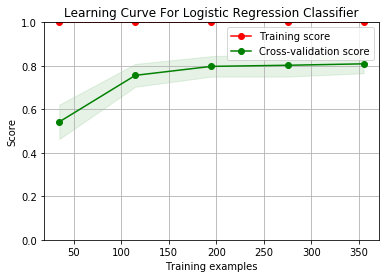

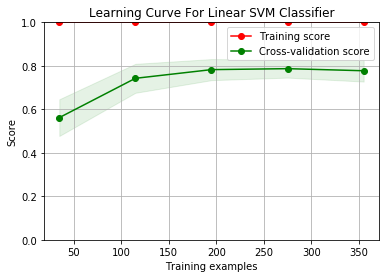

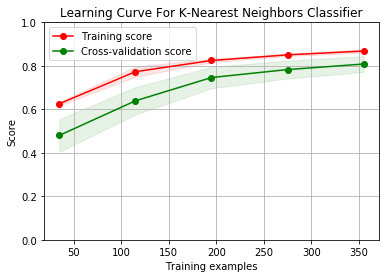

In [11]:

# Here I plot learning curves to help with the decision of which algorithm to use


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(LogisticRegression(), 'Learning Curve For Logistic Regression Classifier', X_train, Y_train, (0,1), 10)
plot_learning_curve(LinearSVC(), 'Learning Curve For Linear SVM Classifier', X_train, Y_train, (0,1), 10)
plot_learning_curve(KNeighborsClassifier(), 'Learning Curve For K-Nearest Neighbors Classifier', X_train, Y_train, (0,1), 10)


In [12]:

# It looks like Logistic Regression and Support Vector Machine both have high bias 
# and could improve with additional training examples.
# K-nearest neighbor might be a little bit overfit, though.
# None of the learning curves are bad enough for us to exclude any of these algorithms.


# Let's see if I can improve the score through parameter optimization.
# I will do a grid search to find the optimal parameters for each classifier.

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Optimize Parameters for LR

def selectParametersForLR(a, b, c, d):

    model = LogisticRegression()
    parameters = {'C': [0.01, 0.1, 0.5, 1.0, 5.0, 10, 25, 50, 100],
                  'solver' : ['newton-cg', 'lbfgs', 'liblinear']}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer, error_score = 0.01)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for LR:')
    print('')
    print(model)
    print('')
#    predictions = model.predict(c)
#    print(accuracy_score(d, predictions))
#    print('Logistic Regression - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('Logistic Regression - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
    return

selectParametersForLR(X_train, Y_train, X_test, Y_test)

# Optimize Parameters for SVM

def selectParametersForSVM(a, b, c, d):

    model = SVC()
    parameters = {'C': [0.01, 0.1, 0.5, 1.0, 5.0, 10, 25, 50, 100],
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for SVM:')
    print('')
    print(model)
    print('')
#    predictions = model.predict(c)
#    print(accuracy_score(d, predictions))
#    print('Logistic Regression - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('Linear Support Vector Machine - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
    return

selectParametersForSVM(X_train, Y_train, X_test, Y_test)

# Optimize Parameters for KNN

def selectParametersForKNN(a, b, c, d):

    model = KNeighborsClassifier()
    parameters = {'n_neighbors': [5, 10, 25, 50],
                  'algorithm': ['ball_tree', 'kd_tree'],
                  'leaf_size': [5, 10, 25, 50]}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for KNN:')
    print('')
    print(model)
    print('')
#    predictions = model.predict(c)
#    print(accuracy_score(d, predictions))
#    print('Logistic Regression - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('K-Nearest Neighbors Classifier - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
    return

selectParametersForKNN(X_train, Y_train,  X_test, Y_test)


Selected Parameters for LR:

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Logistic Regression - Training set accuracy: 0.77 (0.141774468788)

Selected Parameters for SVM:

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Linear Support Vector Machine - Training set accuracy: 0.77 (0.155241746963)

Selected Parameters for KNN:

KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

K-Nearest Neighbors Classifier - Training set accuracy: 0.65 (0.15)



In [13]:
# That worked well. But maybe we can get even higher accuracy.
# Let's try some additional algorithms now such as neural networks.


# First we will use the Multi-layer Perceptron NN model from Sklearn

# For this we can use a slightly larger sample size.

X = data.iloc[0:5000,1:] # everything but the first column  (pixel values)
y = data.iloc[0:5000,:1] # first column only  (label/answer)
X_train = 0
X_test = 0
Y_train = 0
Y_test = 0
xValues = X
yValues = y.values.ravel()
# Here I split the data for cross-validation again
X_train, X_test, Y_train, Y_test = train_test_split(xValues, yValues, test_size=0.2, random_state=23)
# Here I do the binary conversion again
X_train = X_train/ 256
X_test = X_test / 256

from sklearn.neural_network import MLPClassifier as MLPC

def runMLPC(a,b,c,d):
    classifier = MLPC()
    classifier.fit(a, b)
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(classifier, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('SKlearn Multi-layer Perceptron NN - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
runMLPC(X_train, Y_train,  X_test, Y_test)

SKlearn Multi-layer Perceptron NN - Training set accuracy: 0.894 (0.0195959179423)



In [14]:
# Now let's see if we can improve the score with parameter optimization

# Optimize Parameters for MLP-NN

def selectParametersForMLPC(a, b, c, d):

    model = MLPC()
    parameters = {'verbose': [False],
                  'activation': ['logistic', 'relu'],
                  'hidden_layer_sizes': [100, 200]}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for Multi-Layer Perceptron NN:')
    print('')
    print(model)
    print('')
#    predictions = model.predict(c)
#    print(accuracy_score(d, predictions))
#    print('Logistic Regression - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('SKlearn Multi-Layer Perceptron - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
    return

selectParametersForMLPC(X_train, Y_train,  X_test, Y_test)



/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Selected Parameters for Multi-Layer Perceptron NN:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=200, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

SKlearn Multi-Layer Perceptron - Training set accuracy: 0.897 (0.0260959767014)



In [16]:

# Next I will try a convolutional neural network using keras.


# import keras NN libraries

from __future__ import print_function
import keras
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# set keras backend

#import keras
#from keras import backend as K
#import os
import importlib
def set_keras_backend(backend):
    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        importlib.reload(K)
        assert K.backend() == backend
set_keras_backend("tensorflow")


# first we will try to optimize the parameters for the keras cnn


"""https://github.com/fchollet/keras/blob/master/examples/mnist_sklearn_wrapper.py"""
'''Example of how to use sklearn wrapper
Builds simple CNN models on MNIST and uses sklearn's GridSearchCV to find best model
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# load training data and do basic data normalization
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = X_train
y_train = Y_train
x_test = X_test
y_test = Y_test
    
if K.image_data_format() == 'channels_first':
    x_train = x_train.values.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.values.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.values.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.values.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


def make_model(dense_layer_sizes, filters, kernel_size, pool_size):
    '''Creates model comprised of 2 convolutional layers followed by dense layers
    dense_layer_sizes: List of layer sizes.
        This list has one number for each layer
    filters: Number of convolutional filters in each convolutional layer
    kernel_size: Convolutional kernel size
    pool_size: Size of pooling area for max pooling
    '''

    model = Sequential()
    model.add(Conv2D(filters, kernel_size,
                     padding='valid',
                     input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(filters, kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Dropout(0.25))

    model.add(Flatten())
    for layer_size in dense_layer_sizes:
        model.add(Dense(layer_size))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    return model

dense_size_candidates = [[32], [64], [32, 32], [64, 64]]
my_classifier = KerasClassifier(make_model, batch_size=32)
validator = GridSearchCV(my_classifier,
                         param_grid={'dense_layer_sizes': dense_size_candidates,
                                     # epochs is avail for tuning even when not
                                     # an argument to model building function
                                     'epochs': [3, 6],
                                     'filters': [8],
                                     'kernel_size': [3],
                                     'pool_size': [2]},
                         scoring='neg_log_loss',
                         n_jobs=1)
validator.fit(x_train, y_train)

print('The parameters of the best model are: ')
print(validator.best_params_)

# validator.best_estimator_ returns sklearn-wrapped version of best model.
# validator.best_estimator_.model returns the (unwrapped) keras model
best_model = validator.best_estimator_.model
metric_names = best_model.metrics_names
metric_values = best_model.evaluate(x_test, y_test)
for metric, value in zip(metric_names, metric_values):
    print(metric, ': ', value)


#The parameters of the best model are: 
#{'dense_layer_sizes': [64, 64], 'epochs': 6, 'filters': 8, 'kernel_size': 3, 'pool_size': 2}
# 9984/10000 [============================>.] - ETA: 0sloss :  0.0554280065138
#acc :  0.9822



Epoch 1/3
2666/2666 [==============================] - 1s - loss: 2.0530 - acc: 0.2761     
Epoch 2/3
2666/2666 [==============================] - 0s - loss: 1.3676 - acc: 0.5398     
Epoch 3/3
2667/2667 [==============================] - 1s - loss: 2.0756 - acc: 0.2463     
Epoch 2/3
2667/2667 [==============================] - 0s - loss: 1.4015 - acc: 0.5268     
Epoch 3/3
2667/2667 [==============================] - 1s - loss: 2.0207 - acc: 0.2831     
Epoch 2/3
2667/2667 [==============================] - 0s - loss: 1.2846 - acc: 0.5508     
Epoch 3/3
2666/2666 [==============================] - 1s - loss: 2.1161 - acc: 0.2498     
Epoch 2/6
2666/2666 [==============================] - 0s - loss: 1.3446 - acc: 0.5405     
Epoch 3/6
2666/2666 [==============================] - 0s - loss: 0.9967 - acc: 0.6658     
Epoch 4/6
2666/2666 [==============================] - 0s - loss: 0.8793 - acc: 0.7071     
Epoch 5/6
2666/2666 [==============================] - 0s - loss: 0.8017 - acc: 

2667/2667 [==============================] - 0s - loss: 0.7909 - acc: 0.7473     
Epoch 5/6
2667/2667 [==============================] - 0s - loss: 0.7008 - acc: 0.7630     
Epoch 6/6
2666/2666 [==============================] - 1s - loss: 1.7549 - acc: 0.3957     
Epoch 2/3
2666/2666 [==============================] - 0s - loss: 0.8455 - acc: 0.7206     
Epoch 3/3
2667/2667 [==============================] - 1s - loss: 1.7757 - acc: 0.4012     
Epoch 2/3
2667/2667 [==============================] - 0s - loss: 0.8451 - acc: 0.7222     
Epoch 3/3
2667/2667 [==============================] - 1s - loss: 1.8836 - acc: 0.3618     
Epoch 2/3
2667/2667 [==============================] - 0s - loss: 0.8255 - acc: 0.7282     
Epoch 3/3
2666/2666 [==============================] - 1s - loss: 1.8434 - acc: 0.3702     
Epoch 2/6
2666/2666 [==============================] - 0s - loss: 0.9604 - acc: 0.6857     
Epoch 3/6
2666/2666 [==============================] - 0s - loss: 0.6750 - acc: 0.7843    

In [17]:

# Run Keras CNN with optimized parameters

# make_model(dense_layer_sizes, filters, kernel_size, pool_size):
model = make_model([64, 64], 8, 3, 2)
model.fit(x_train, y_train)
score = model.evaluate(x_test, y_test, verbose=0)
print('')
print('Keras Convolutional Neural Network - accuracy:', score[1])
print('')



Epoch 1/10
4000/4000 [==============================] - 1s - loss: 1.5950 - acc: 0.4725     
Epoch 2/10
4000/4000 [==============================] - 1s - loss: 0.8751 - acc: 0.7232     
Epoch 3/10
4000/4000 [==============================] - 1s - loss: 0.6929 - acc: 0.7760     
Epoch 4/10
4000/4000 [==============================] - 1s - loss: 0.6102 - acc: 0.8047     
Epoch 5/10
4000/4000 [==============================] - 1s - loss: 0.5370 - acc: 0.8270     
Epoch 6/10
4000/4000 [==============================] - 1s - loss: 0.5067 - acc: 0.8417     
Epoch 7/10
4000/4000 [==============================] - 1s - loss: 0.4709 - acc: 0.8568     
Epoch 8/10
4000/4000 [==============================] - 1s - loss: 0.4414 - acc: 0.8535     
Epoch 9/10
4000/4000 [==============================] - 1s - loss: 0.4154 - acc: 0.8735     
Epoch 10/10
4000/4000 [==============================] - 1s - loss: 0.4048 - acc: 0.8780     

Keras Convolutional Neural Network - accuracy: 0.941



In [18]:

# run Keras CNN again with optimized parameters

def runKerasCNN(a,b,c,d):
    """
    Run Keras CNN: https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
    """

    batch_size = 128
    num_classes = 10
    epochs = 12
    
    # input image dimensions
    img_rows, img_cols = 28, 28
    
    # the data, shuffled and split between train and test sets
    #(x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = a
    y_train = b
    x_test = c
    y_test = d
    
    # Reshape data (normal)
    if K.image_data_format() == 'channels_first':
        x_train = x_train.values.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.values.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.values.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.values.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    #x_train /= 255
    #x_test /= 255
#    print('x_train shape:', x_train.shape)
#    print(x_train.shape[0], 'train samples')
#    print(x_test.shape[0], 'test samples')
    
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    
    model.fit(x_train, y_train,
              batch_size=batch_size,
              verbose=1,
              epochs=epochs,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    
    #print('Test loss:', score[0])
    print('')
    print('Keras Convolutional Neural Network - accuracy:', score[1])
    print('')

runKerasCNN(X_train, Y_train,  X_test, Y_test)

# In summary, we were able to achieve 97% accuracy in this digit recognition task.
# We achieved similar accuracy rates with multiple types of classification algorirthms
# and multiple types of neural networks.

# Our preferred method is the Keras Convolutional Neural Network, which achieved
# an accuracy rate of 97% on the MNIST Digit Recognition task.

# These results are now ready to submit to the Kaggle MNIST Competition.


Train on 4000 samples, validate on 1000 samples
Epoch 1/12
4000/4000 [==============================] - 3s - loss: 1.3649 - acc: 0.5655 - val_loss: 0.4728 - val_acc: 0.8760
Epoch 2/12
4000/4000 [==============================] - 2s - loss: 0.5894 - acc: 0.8115 - val_loss: 0.2962 - val_acc: 0.9210
Epoch 3/12
4000/4000 [==============================] - 2s - loss: 0.4213 - acc: 0.8730 - val_loss: 0.2238 - val_acc: 0.9330
Epoch 4/12
4000/4000 [==============================] - 2s - loss: 0.3498 - acc: 0.8940 - val_loss: 0.2231 - val_acc: 0.9270
Epoch 5/12
4000/4000 [==============================] - 2s - loss: 0.2841 - acc: 0.9130 - val_loss: 0.1494 - val_acc: 0.9540
Epoch 6/12
4000/4000 [==============================] - 2s - loss: 0.2228 - acc: 0.9317 - val_loss: 0.1429 - val_acc: 0.9570
Epoch 7/12
4000/4000 [==============================] - 2s - loss: 0.1999 - acc: 0.9397 - val_loss: 0.1294 - val_acc: 0.9620
Epoch 8/12
4000/4000 [==============================] - 2s - loss: 0.1720 - a

In [19]:
# To submit to kaggle, see the following code:

##!/usr/bin/env python3
## -*- coding: utf-8 -*-
#"""
#Created on Sun Oct 22 10:23:15 2017
#
#@author: ptm
#"""
#
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.linear_model import LogisticRegression
#from sklearn import model_selection
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import learning_curve
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC, LinearSVC
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from __future__ import print_function
#import keras
##from keras.datasets import mnist
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from keras import backend as K
#
## Set working directory
#import os
#os.chdir('/Users/ptm/Desktop/Current_Working_Directory')
#
####
####
## Now we will submit our code to Kaggle, using the Keras CNN method.
#
## but for now we will submit the answer, this time using an even larger sample size.
#
## For this we can use a slightly larger sample size.
#
#data = pd.read_csv('train.csv')
#testingData = pd.read_csv('test.csv')
##data[data>0]=1
##testingData[testingData>0]=1
#
##testingDataTwo = testingData.values
#
#X = data.drop("label",axis=1).values
#y = data.label.values
#X = data.iloc[0:20000,1:] # everything but the first column  (pixel values)
#y = data.iloc[0:20000,:1] # first column only  (label/answer)
#X_train = 0
#X_test = 0
#Y_train = 0
#Y_test = 0
#xValues = X
#yValues = y.values.ravel()
#X_train, X_test, Y_train, Y_test = train_test_split(xValues, yValues, test_size=0.2, random_state=23)
#
##X_train[X_train>0]=1
##X_test[X_test>0]=1
#
#X_train = X_train/ 256
#X_test = X_test / 256
#testingData = testingData / 256
#
#
##########
##########
##########
#
#
#
#
## run Keras CNN
#
#
#batch_size = 128
#num_classes = 10
#epochs = 12
#    
#batch_size = 128
#num_classes = 10
#epochs = 12
#    
#    # input image dimensions
#img_rows, img_cols = 28, 28
#    
#    # the data, shuffled and split between train and test sets
#x_train = X_train
#y_train = Y_train
#x_test = X_test
#y_test = Y_test
#    
#if K.image_data_format() == 'channels_first':
#    x_train = x_train.values.reshape(x_train.shape[0], 1, img_rows, img_cols)
#    x_test = x_test.values.reshape(x_test.shape[0], 1, img_rows, img_cols)
#    input_shape = (1, img_rows, img_cols)
#else:
#    x_train = x_train.values.reshape(x_train.shape[0], img_rows, img_cols, 1)
#    x_test = x_test.values.reshape(x_test.shape[0], img_rows, img_cols, 1)
#    input_shape = (img_rows, img_cols, 1)
#    
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#    #x_train /= 255
#    #x_test /= 255
##    print('x_train shape:', x_train.shape)
##    print(x_train.shape[0], 'train samples')
##    print(x_test.shape[0], 'test samples')
#    
#    # convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)
#    
#    
#model = Sequential()
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))
#    
#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
#    
#model.fit(x_train, y_train, batch_size=batch_size, verbose=1, epochs=epochs, validation_data=(x_test, y_test))
#score = model.evaluate(x_test, y_test, verbose=0)
#    
#    #print('Test loss:', score[0])
#print('')
#print('Keras Convolutional Neural Network - accuracy:', score[1])
#print('')
#
#
## Reshape testingData
#
#
#if K.image_data_format() == 'channels_first':
#    testingData = testingData.values.reshape(testingData.shape[0], 1, img_rows, img_cols)
#    input_shape = (1, img_rows, img_cols)
#else:
#    testingData = testingData.values.reshape(testingData.shape[0], img_rows, img_cols, 1)
#    input_shape = (img_rows, img_cols, 1)
#
#
#
#
#
## Step 2: Submit to Kaggle
#
#
#FinalTestingData = testingData.astype('float32')
#yPred = model.predict_classes(FinalTestingData)
#np.savetxt('finalTestingDataCNN_3.csv', np.c_[range(1,len(yPred)+1),yPred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')
#
#
#
#
#
